## 군집화 평가 - 실루엣(Silhoutte) 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

In [4]:
kmeans = KMeans(n_clusters=3, random_state=2023, n_init='auto')
kmeans.fit(iris_std)

KMeans(n_clusters=3, n_init='auto', random_state=2023)

In [5]:
df = pd.DataFrame(iris_std, columns=['sl','sw','pl','pw'])
df['target'] = iris.target
df['cluster'] = kmeans.labels_
df.head(54).tail()

,sl,sw,pl,pw,target,cluster
49,-1.021849,0.558611,-1.340227,-1.315444,0,0
50,1.401508,0.328414,0.535409,0.264142,1,1
51,0.674501,0.328414,0.421734,0.395774,1,1
52,1.280340,0.098217,0.649083,0.395774,1,1
53,-0.416010,-1.743357,0.137547,0.132510,1,2


- 실루엣 계수

In [6]:
from sklearn.metrics import silhouette_samples, silhouette_score

sil_samples = silhouette_samples(iris_std, kmeans.labels_)
df['실루엣 계수'] = sil_samples
df.head(54).tail()

,sl,sw,pl,pw,target,cluster,실루엣 계수
49,-1.021849,0.558611,-1.340227,-1.315444,0,0,0.713721
50,1.401508,0.328414,0.535409,0.264142,1,1,0.383108
51,0.674501,0.328414,0.421734,0.395774,1,1,0.257225
52,1.280340,0.098217,0.649083,0.395774,1,1,0.412148
53,-0.416010,-1.743357,0.137547,0.132510,1,2,0.543599


- 실루엣 스코어

In [7]:
silhouette_score(iris_std, kmeans.labels_)

0.4565352255831263

In [8]:
# 각 점의 실루엣 계수의 평균이 실루엣 스코어
df['실루엣 계수'].mean()

0.4565352255831263

In [9]:
df.groupby('cluster')[['실루엣 계수']].mean()

,실루엣 계수
cluster,
0,0.650021
1,0.345434
2,0.383269


- 실루엣 스코어 시각화

In [10]:
for n in [2,3,4,5]:
    km = KMeans(n_clusters=n, random_state=2023, n_init='auto')
    km.fit(iris_std)
    score = silhouette_score(iris_std, km.labels_)
    print(f'군집갯수: {n}, 실루엣 스코어: {score:.4f}')

군집갯수: 2, 실루엣 스코어: 0.5818
군집갯수: 3, 실루엣 스코어: 0.4565


군집갯수: 4, 실루엣 스코어: 0.4189
군집갯수: 5, 실루엣 스코어: 0.3890


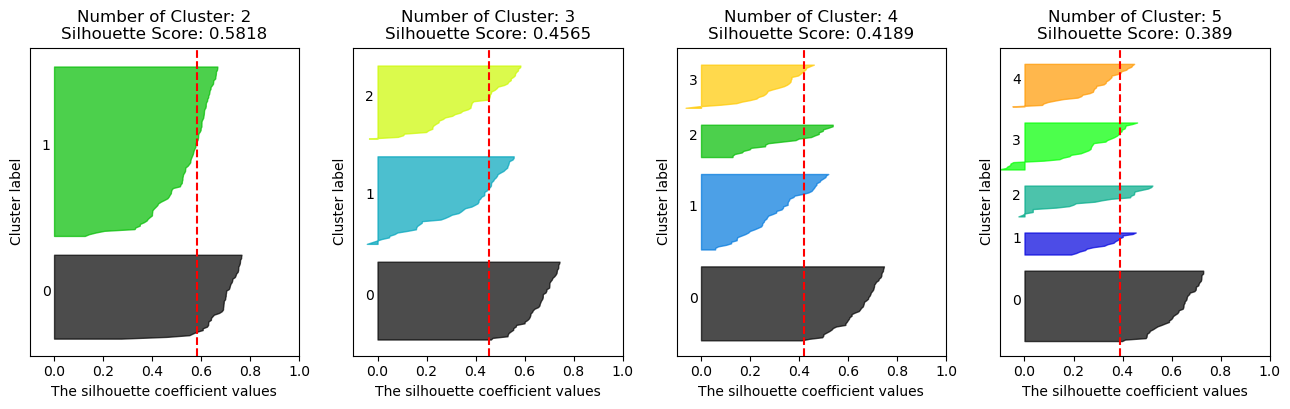

In [11]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5], iris_std)